In [1]:
import platform

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import math

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

### Step0. 기초 테이블 생성

In [2]:
# 엑셀파일 불러오기
mission_data_xls = './data/mission_data.xlsx'

In [3]:
data_susin = pd.read_excel(mission_data_xls)
data_susin.head()

,base_dt,acno,gds_cd,stcd,cstno
0,20220131,1111021010800000,ZZZZAA,정상,30000000111
1,20220131,1111021010800001,ZZZZAB,해지,30000000111
2,20220131,1111021010800002,ZZZZAC,정상,30000000113
3,20220131,1111021010800003,ZZZZAD,정상,30000000114
4,20220131,1111021010800004,ZZZZAD,정상,30000000115


In [4]:
data_cstno = pd.read_excel(mission_data_xls, sheet_name=1)
data_cstno.head()

,cstno,age,sex,add
0,30000000111,11,F,전북
1,30000000113,12,F,경기
2,30000000114,13,F,인천
3,30000000115,14,M,전북
4,30000000116,15,F,전남


In [5]:
data_gds_cd = pd.read_excel(mission_data_xls, sheet_name=2)
data_gds_cd.head()

,gds_cd,gds_nm,gds_dvcd
0,ZZZZAA,JB다이렉트예금,예금
1,ZZZZAB,JB스마트정기예금,예금
2,ZZZZAC,JB최강전북축구사랑예금,예금
3,ZZZZAD,JB골든에이지예금,예금
4,ZZZZBA,JB다이렉트적금,적금


In [6]:
# 테이블 조인
left = data_susin
right = data_cstno
mission_data1 = pd.merge(left, right, on='cstno')
mission_data1.head()

,base_dt,acno,gds_cd,stcd,cstno,age,sex,add
0,20220131,1111021010800000,ZZZZAA,정상,30000000111,11,F,전북
1,20220131,1111021010800001,ZZZZAB,해지,30000000111,11,F,전북
2,20220228,1111021010800000,ZZZZAA,정상,30000000111,11,F,전북
3,20220331,1111021010800000,ZZZZAA,정상,30000000111,11,F,전북
4,20220131,1111021010800002,ZZZZAC,정상,30000000113,12,F,경기


In [7]:
left = mission_data1
right = data_gds_cd
mission_data2 = pd.merge(left, right, on='gds_cd')
mission_data2.head()

,base_dt,acno,gds_cd,stcd,cstno,age,sex,add,gds_nm,gds_dvcd
0,20220131,1111021010800000,ZZZZAA,정상,30000000111,11,F,전북,JB다이렉트예금,예금
1,20220228,1111021010800000,ZZZZAA,정상,30000000111,11,F,전북,JB다이렉트예금,예금
2,20220331,1111021010800000,ZZZZAA,정상,30000000111,11,F,전북,JB다이렉트예금,예금
3,20220228,1111021010800039,ZZZZAA,정상,30000000117,16,M,경북,JB다이렉트예금,예금
4,20220228,1111021010800044,ZZZZAA,정상,30000000117,16,M,경북,JB다이렉트예금,예금


In [8]:
# 정상계좌만 추출
data1 = mission_data2[mission_data2.stcd == '정상']
data1

,base_dt,acno,gds_cd,stcd,cstno,age,sex,add,gds_nm,gds_dvcd
0,20220131,1111021010800000,ZZZZAA,정상,30000000111,11,F,전북,JB다이렉트예금,예금
1,20220228,1111021010800000,ZZZZAA,정상,30000000111,11,F,전북,JB다이렉트예금,예금
2,20220331,1111021010800000,ZZZZAA,정상,30000000111,11,F,전북,JB다이렉트예금,예금
3,20220228,1111021010800039,ZZZZAA,정상,30000000117,16,M,경북,JB다이렉트예금,예금
4,20220228,1111021010800044,ZZZZAA,정상,30000000117,16,M,경북,JB다이렉트예금,예금
...,...,...,...,...,...,...,...,...,...,...
192,20220331,1111021010800019,ZZZZBC,정상,30000000130,22,F,제주,JB카드재테크적금,적금
194,20220331,1111021010800174,ZZZZBC,정상,30000000283,55,M,경기,JB카드재테크적금,적금
195,20220331,1111021010800175,ZZZZBC,정상,30000000284,56,F,인천,JB카드재테크적금,적금
196,20220331,1111021010800178,ZZZZBC,정상,30000000287,58,M,경기,JB카드재테크적금,적금


In [9]:
# 데이터파일로 저장
df = pd.DataFrame(data1)
df.to_csv('data/mission_data_v2.csv', sep=',', encoding='UTF-8')

### Step1. 2022년 1~3월말 기준 예/적금 좌수 현황

In [10]:
data2 = data1.groupby(["gds_dvcd", "base_dt"]).size().unstack(1)
data2

base_dt,20220131,20220228,20220331
gds_dvcd,,,
예금,19,39,57
적금,11,19,42


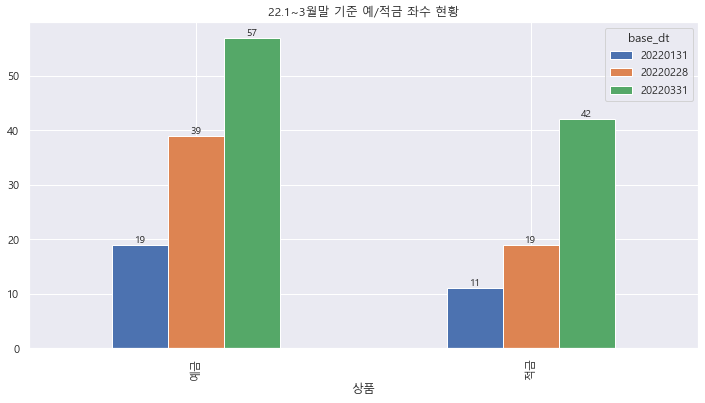

In [12]:
ax = data2.plot(kind='bar', xlabel='상품', title="22.1~3월말 기준 예/적금 좌수 현황")

for c in ax.containers:
    labels = [ x.get_height() for x in c ]
    ax.bar_label(c, labels=labels, label_type='edge')

### Step2. 2022.3월말 기준 다이렉트예금 보유고객 특성별 현황

#### Step2-1. 성별

In [13]:
# 22.3월기준 / 정상 / JB다이렉트예금 DF 생성
d_3m_tmp  = mission_data2[mission_data2.base_dt == 20220331]
d_3m_tmp2 = d_3m_tmp[d_3m_tmp.stcd == '정상']
d_3m_tmp3 = d_3m_tmp2[d_3m_tmp2.gds_nm == 'JB다이렉트예금']
d_3m_tmp3.head()

,base_dt,acno,gds_cd,stcd,cstno,age,sex,add,gds_nm,gds_dvcd
2,20220331,1111021010800000,ZZZZAA,정상,30000000111,11,F,전북,JB다이렉트예금,예금
8,20220331,1111021010800011,ZZZZAA,정상,30000000122,13,M,경기,JB다이렉트예금,예금
9,20220331,1111021010800197,ZZZZAA,정상,30000000122,13,M,경기,JB다이렉트예금,예금
12,20220331,1111021010800018,ZZZZAA,정상,30000000126,21,M,경북,JB다이렉트예금,예금
15,20220331,1111021010800021,ZZZZAA,정상,30000000132,26,F,전북,JB다이렉트예금,예금


In [14]:
# 고객 중복 제거
d_3m = d_3m_tmp3.drop_duplicates(['cstno'])
d_3m.head()

,base_dt,acno,gds_cd,stcd,cstno,age,sex,add,gds_nm,gds_dvcd
2,20220331,1111021010800000,ZZZZAA,정상,30000000111,11,F,전북,JB다이렉트예금,예금
8,20220331,1111021010800011,ZZZZAA,정상,30000000122,13,M,경기,JB다이렉트예금,예금
12,20220331,1111021010800018,ZZZZAA,정상,30000000126,21,M,경북,JB다이렉트예금,예금
15,20220331,1111021010800021,ZZZZAA,정상,30000000132,26,F,전북,JB다이렉트예금,예금
18,20220331,1111021010800026,ZZZZAA,정상,30000000137,25,M,경북,JB다이렉트예금,예금


In [15]:
df_sex_3m = pd.Series(1, index=d_3m['sex'].values)
df_sex_3m

F    1
M    1
M    1
F    1
M    1
F    1
M    1
F    1
F    1
F    1
F    1
F    1
M    1
F    1
F    1
F    1
M    1
F    1
F    1
F    1
F    1
F    1
F    1
F    1
F    1
F    1
F    1
M    1
F    1
F    1
F    1
M    1
F    1
F    1
M    1
dtype: int64

In [16]:
def get_sex_cnt(d_3m):
    sex_cnt = {}
    for idx in range(len(d_3m.index)):
        
        sex   = d_3m.index[idx]
        count = d_3m[idx]
        
        if sex_cnt.get(sex):
            sex_cnt[sex] += count
        else:
            sex_cnt[sex] = count
            
    return sex_cnt

sex_dict = get_sex_cnt(df_sex_3m)
sex_dict

{'F': 26, 'M': 9}

In [17]:
sex_stat = Series(sex_dict)
sex_stat.name = "성별"
sex_stat

F    26
M     9
Name: 성별, dtype: int64

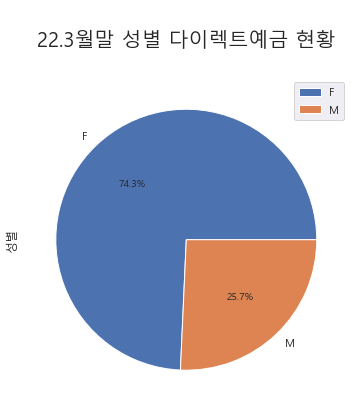

In [18]:
sex_stat.plot(kind='pie', autopct='%.1f%%');
plt.rcParams["figure.figsize"] = [8,8]
plt.title("\n22.3월말 성별 다이렉트예금 현황\n", fontsize=20)
plt.legend()

#### Step2-2. 연령별

In [19]:
d_3m['age']

2     11
8     13
12    21
15    26
18    25
21    26
24    29
27    22
30    22
34    34
38    35
52    43
53    43
54    43
55    43
56    43
57    43
58    47
59    44
60    44
61    48
62    48
63    46
64    46
65    49
66    50
67    54
68    54
69    55
70    55
71    55
72    62
73    66
74    69
75    71
Name: age, dtype: int64

In [20]:
age_series = d_3m.age.dropna().apply(lambda age: math.floor(age / 10) * 10)
                    #NaN값 날리기                  #floor -> 소숫점값 날려버리기
age_series.name = "Age_Group"

In [21]:
age_stat = age_series
age_stat

2     10
8     10
12    20
15    20
18    20
21    20
24    20
27    20
30    20
34    30
38    30
52    40
53    40
54    40
55    40
56    40
57    40
58    40
59    40
60    40
61    40
62    40
63    40
64    40
65    40
66    50
67    50
68    50
69    50
70    50
71    50
72    60
73    60
74    60
75    70
Name: Age_Group, dtype: int64

In [22]:
age_stat.value_counts()

40    14
20     7
50     6
60     3
10     2
30     2
70     1
Name: Age_Group, dtype: int64

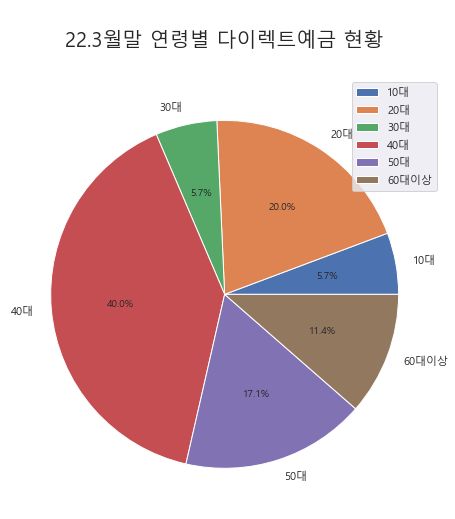

In [23]:
plt.rcParams["figure.figsize"] = [8,8]

labels = ['10대', '20대', '30대', '40대', '50대', '60대이상']
# sizes = age_stat.value_counts()   -> 순서가 정렬이 안돼서 일단 별도표기
sizes = [2, 7, 2, 14, 6, 4]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("\n22.3월말 연령별 다이렉트예금 현황\n", fontsize=20)
plt.legend(loc=1)
plt.show()

#### Step2-3. 지역별

In [24]:
df_add_3m = pd.Series(1, index=d_3m['add'].values)
df_add_3m

전북    1
경기    1
경북    1
전북    1
경북    1
제주    1
경남    1
경기    1
인천    1
경북    1
제주    1
서울    1
경기    1
인천    1
전북    1
전남    1
서울    1
전북    1
인천    1
서울    1
인천    1
전북    1
경기    1
인천    1
서울    1
경기    1
서울    1
경기    1
인천    1
전북    1
서울    1
전북    1
서울    1
경기    1
전북    1
dtype: int64

In [25]:
def get_add_cnt(d_3m):
    add_cnt = {}
    for idx in range(len(d_3m.index)):
        
        add   = d_3m.index[idx]
        count = d_3m[idx]
        
        if add_cnt.get(add):
            add_cnt[add] += count
        else:
            add_cnt[add] = count
            
    return add_cnt

add_dict = get_add_cnt(df_add_3m)
add_dict

{'전북': 8, '경기': 7, '경북': 3, '제주': 2, '경남': 1, '인천': 6, '서울': 7, '전남': 1}

In [26]:
add_stat = Series(add_dict)
add_stat.name = "지역별"
add_stat

전북    8
경기    7
경북    3
제주    2
경남    1
인천    6
서울    7
전남    1
Name: 지역별, dtype: int64

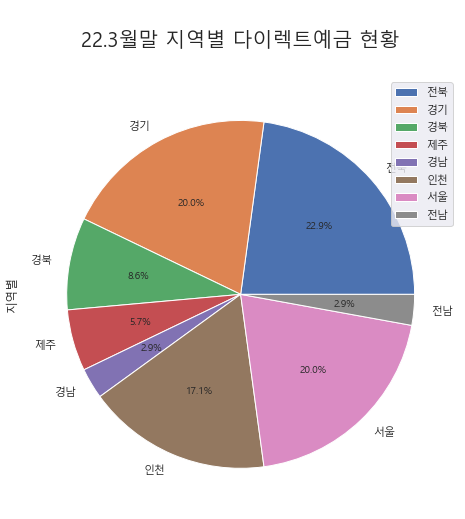

In [27]:
plt.rcParams["figure.figsize"] = [8,8]
# crime_stat.plot(kind='pie');

add_stat.plot(kind='pie', autopct='%.1f%%');
plt.legend(loc=1)
plt.title("\n22.3월말 지역별 다이렉트예금 현황\n", fontsize=20)
plt.legend()

### Step3. 함수 모듈화 및 1paper 구현

In [28]:
def draw_pieplot(param):
    if param == 'Sex':
        sex_stat.plot(kind='pie', autopct='%.1f%%');
        plt.rcParams["figure.figsize"] = [10,10]
        plt.title("\n22.3월말 성별 다이렉트예금 현황\n", fontsize=20)
        plt.legend()
   
    elif param == 'Age':
        plt.rcParams["figure.figsize"] = [10,10]
        labels = ['10대', '20대', '30대', '40대', '50대', '60대이상']
        sizes = [2, 7, 2, 14, 6, 4]
        plt.pie(sizes, labels=labels, autopct='%1.1f%%')    # 수정사항
        plt.title("\n22.3월말 연령별 다이렉트예금 현황\n", fontsize=20)
        plt.legend(loc=1)

    elif param == 'Add':
        plt.rcParams["figure.figsize"] = [10,10]
        add_stat.plot(kind='pie', autopct='%.1f%%');
        plt.legend(loc=1)
        plt.title("\n22.3월말 지역별 다이렉트예금 현황\n", fontsize=20)
        plt.legend()
        
    else :
        print("Not Operation !!")
        return

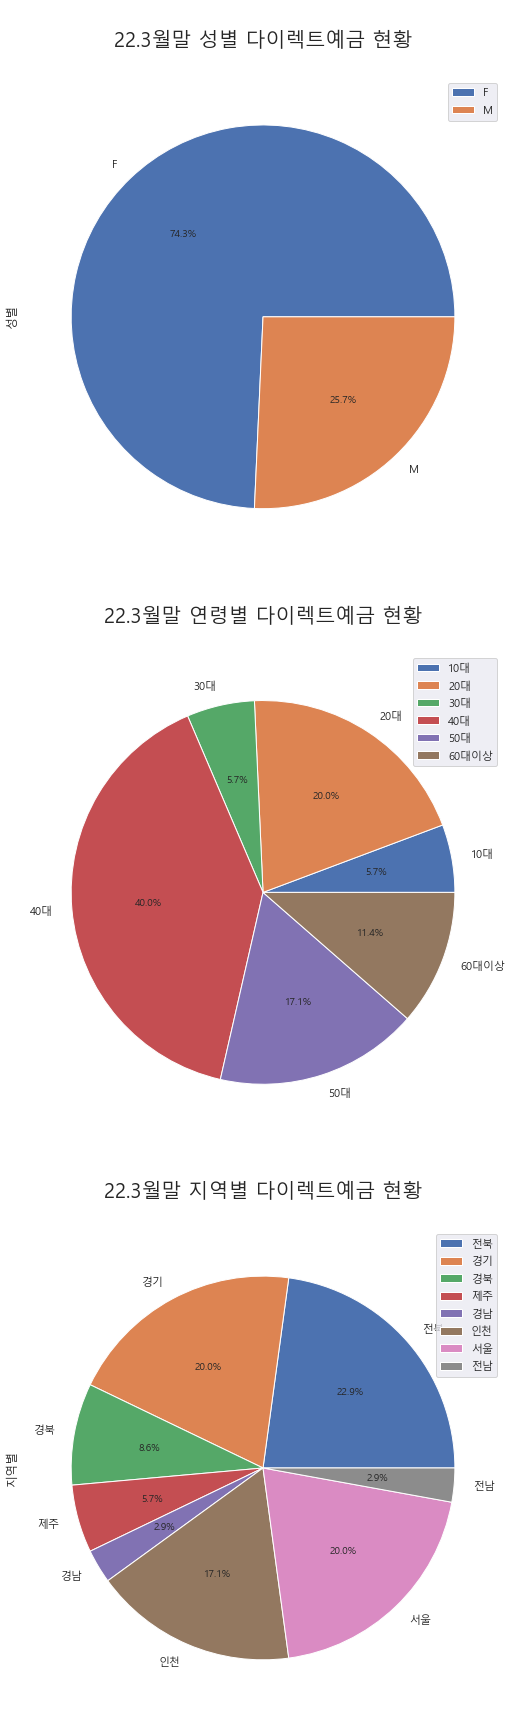

In [29]:
plt.figure(figsize=(30, 30))

plt.subplot(311)
draw_pieplot('Sex')

plt.subplot(312)
draw_pieplot('Age')

plt.subplot(313)
draw_pieplot('Add')